<a href="https://colab.research.google.com/github/Nabielah27/music-py/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



In [12]:
dataset = pd.read_csv("/content/drive/MyDrive/bank/bank-additional/bank-additional/bank-additional-full.csv", sep = ';')

In [56]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
!pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo

In [17]:
bank_marketing = fetch_ucirepo(id=222)

In [18]:
bank_marketing

{'data': {'ids': None,
  'features':        age           job   marital  education default  balance housing loan  \
  0       58    management   married   tertiary      no     2143     yes   no   
  1       44    technician    single  secondary      no       29     yes   no   
  2       33  entrepreneur   married  secondary      no        2     yes  yes   
  3       47   blue-collar   married        NaN      no     1506     yes   no   
  4       33           NaN    single        NaN      no        1      no   no   
  ...    ...           ...       ...        ...     ...      ...     ...  ...   
  45206   51    technician   married   tertiary      no      825      no   no   
  45207   71       retired  divorced    primary      no     1729      no   no   
  45208   72       retired   married  secondary      no     5715      no   no   
  45209   57   blue-collar   married  secondary      no      668      no   no   
  45210   37  entrepreneur   married  secondary      no     2971      no  

In [20]:
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [22]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [23]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('y').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
print(bank_marketing.matedata)

None


In [25]:
print(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

In [26]:
print(X.isnull().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


In [27]:
print(X.dtypes)

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object


In [28]:
print(X.nunique())

age              77
job              11
marital           3
education         3
default           2
balance        7168
housing           2
loan              2
contact           2
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          3
dtype: int64


In [29]:
print(X.corr())

                  age   balance  day_of_week  duration  campaign     pdays  \
age          1.000000  0.097783    -0.009120 -0.004648  0.004760 -0.023758   
balance      0.097783  1.000000     0.004503  0.021560 -0.014578  0.003435   
day_of_week -0.009120  0.004503     1.000000 -0.030206  0.162490 -0.093044   
duration    -0.004648  0.021560    -0.030206  1.000000 -0.084570 -0.001565   
campaign     0.004760 -0.014578     0.162490 -0.084570  1.000000 -0.088628   
pdays       -0.023758  0.003435    -0.093044 -0.001565 -0.088628  1.000000   
previous     0.001288  0.016674    -0.051710  0.001203 -0.032855  0.454820   

             previous  
age          0.001288  
balance      0.016674  
day_of_week -0.051710  
duration     0.001203  
campaign    -0.032855  
pdays        0.454820  
previous     1.000000  


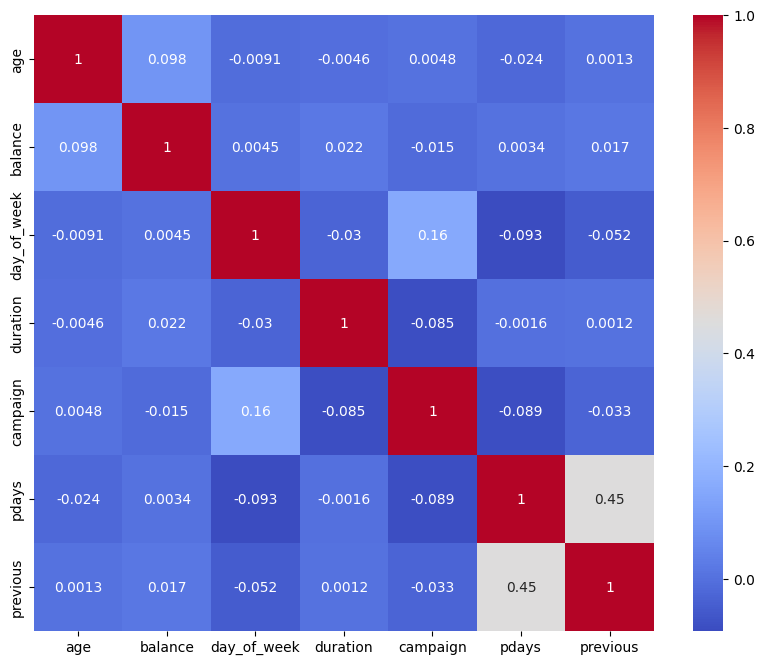

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

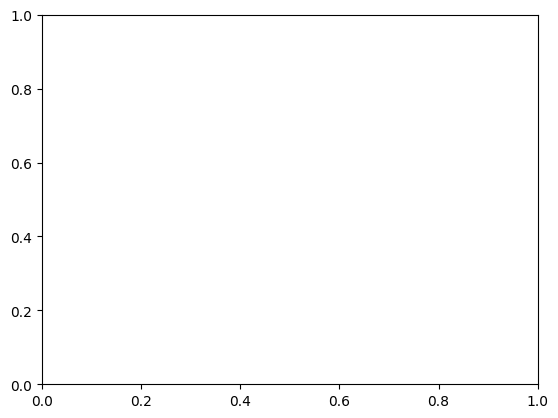

In [34]:
sns.countplot(X=y)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

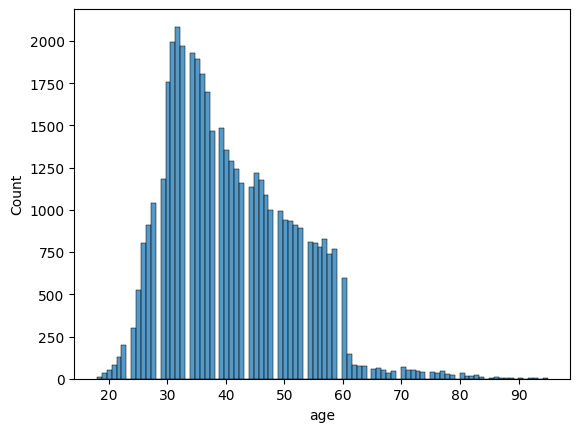

In [36]:
sns.histplot(x=X ['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

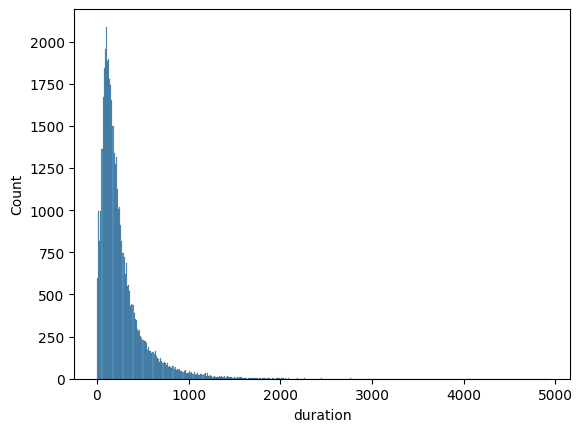

In [38]:
sns.histplot(x=X ['duration'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

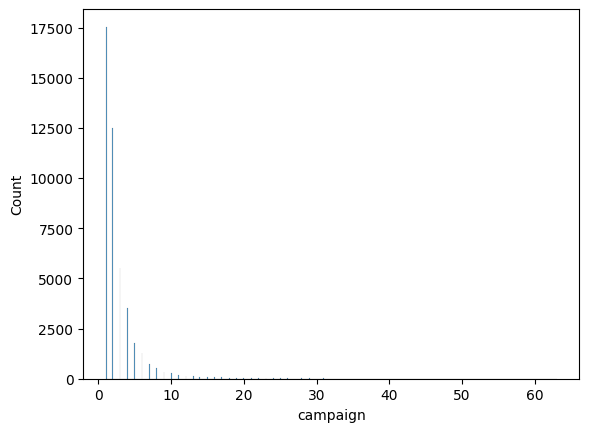

In [39]:
sns.histplot(x=X ['campaign'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

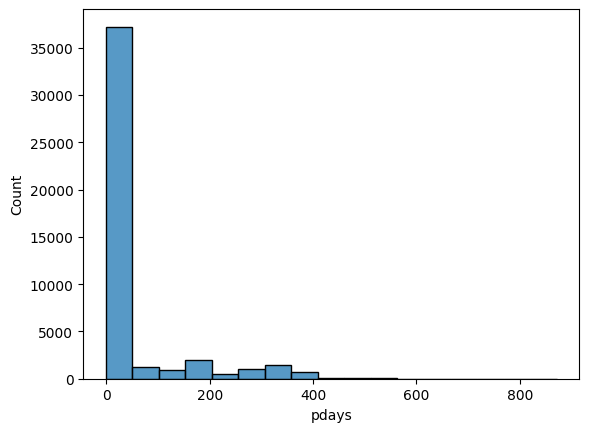

In [40]:
sns.histplot(x=X ['pdays'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

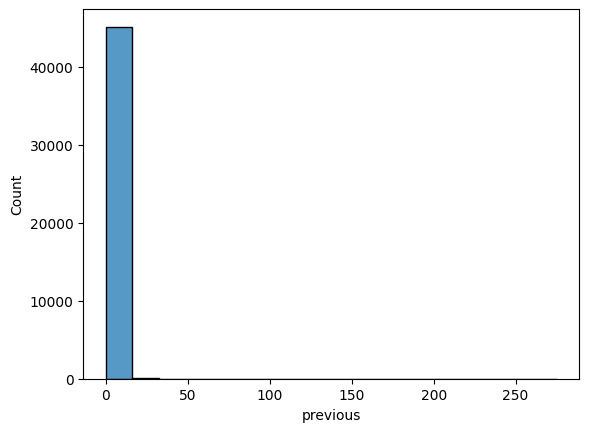

In [41]:
sns.histplot(x=X ['previous'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

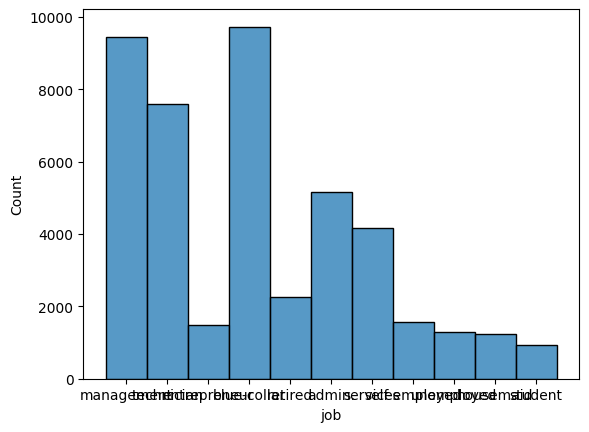

In [42]:
sns.histplot(x=X ['job'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

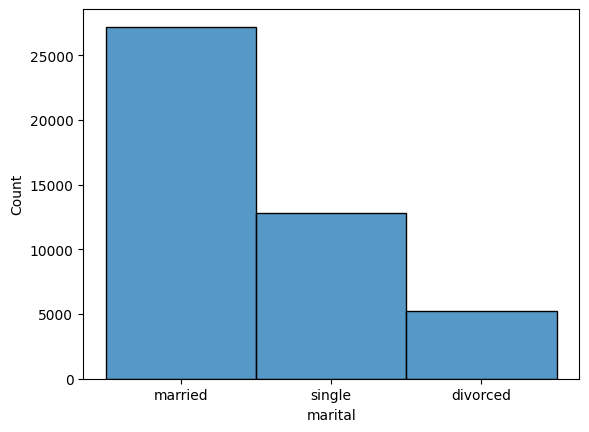

In [43]:
sns.histplot(x=X ['marital'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

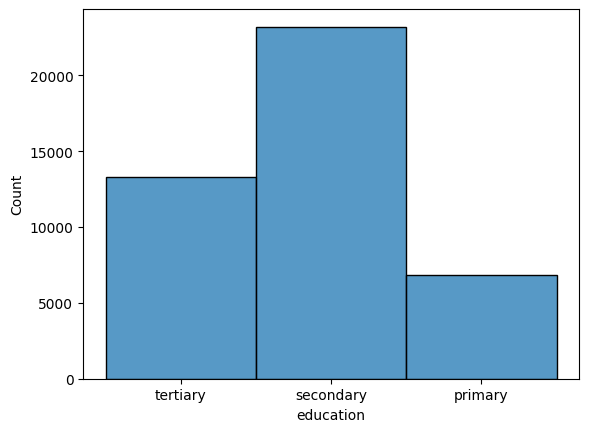

In [44]:
sns.histplot(x=X ['education'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

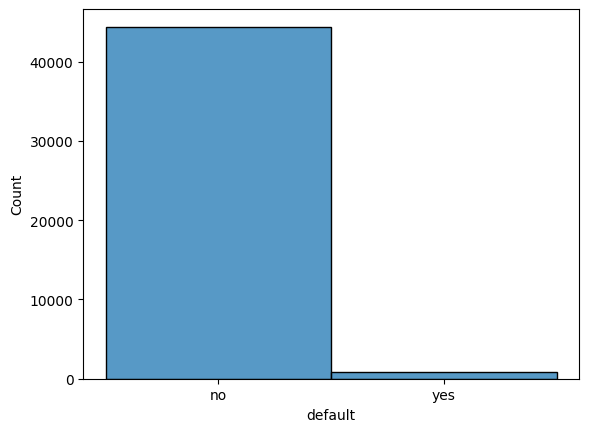

In [45]:
sns.histplot(x=X ['default'])
plt.show

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("/content/drive/MyDrive/bank/bank-additional/bank-additional/bank-additional-full.csv", sep=';')

In [50]:
y = df['y']

In [52]:
y = np.where(df['y'] == 'yes', 1, 0)

In [54]:
y

array([0, 0, 0, ..., 0, 1, 0])